In [1]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

# Thinking about space. 

If we had a point in 2D space, we can represent it as (x,y). 
We also know that if we had two points, $A = (0,1)$ and $B =(0,10)$.

We know that B is above A. 

# Lines 
The general equation of a line is:
$$ Ax + By + c = 0 $$
We define a line by making a relationship between x and y. When we are plotting this line, we are really asking what points satisfy this reletion. 

We can also rearrange the equation to get a $ y = $ or an $ x = $  . 
Rearranging this equation to $ y = f(x) $, allows us to ask a different question. For the line (the reletionship) we have defined in the reletionship/function $ f(x) $, we can give an $ x $ and get the $ y $ that fits this reletionship. 

$$ y = ax + b $$

In [2]:
# Lets make one of these functions which takes in an X and gives us the Y that the X maps to. 
def straight_line(a,x,b):
    y = a*x +b 
    return y

Now we have our equation in the form of $ y = f(x) $, we can see how it works. Use the sliders to change the parameters below and see what happens. 

<IPython.core.display.Javascript object>


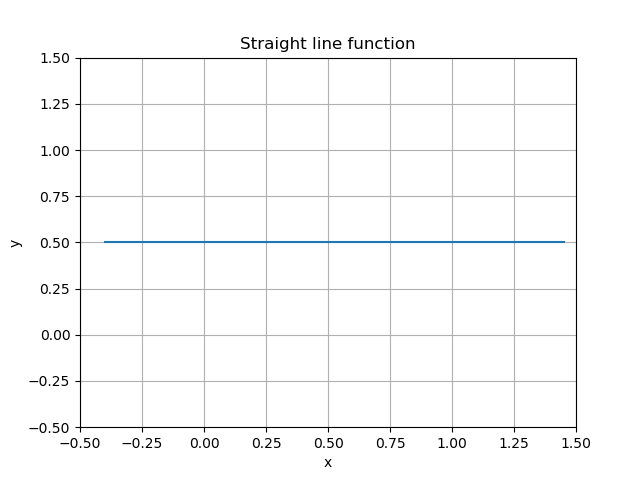

interactive(children=(FloatSlider(value=0.0, description='a', max=3.0, min=-3.0), FloatSlider(value=0.0, descr…

In [3]:
# Plotting a line in 2D space. 
x = np.arange(-0.4, 1.5, .05)
sigma_fn = np.vectorize(straight_line)
sigma = sigma_fn(1,x,0)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(x, sigma)

ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-0.5,1.5])
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Straight line function')

def update(a = 1.0, b = 1.0):
    line.set_ydata(sigma_fn(a,x,b))
    fig.canvas.draw_idle()

slow = interactive(update,a=FloatSlider(min=-3, max=3, step=0.1), b =FloatSlider(min=-3, max=3, step=0.1));
fig.show()
slow

s$$ y = ax + b $$
We note a few important things:
* Increasing a gives us a higher gradient (slope).
* We can change the direction of our slope by making a negative. 
* Changing B will move this slope around in space. 
* No matter what we do, the line remains straight (linear).

Lets say we had two points and we wanted to know if they are above or below our line. 

<IPython.core.display.Javascript object>


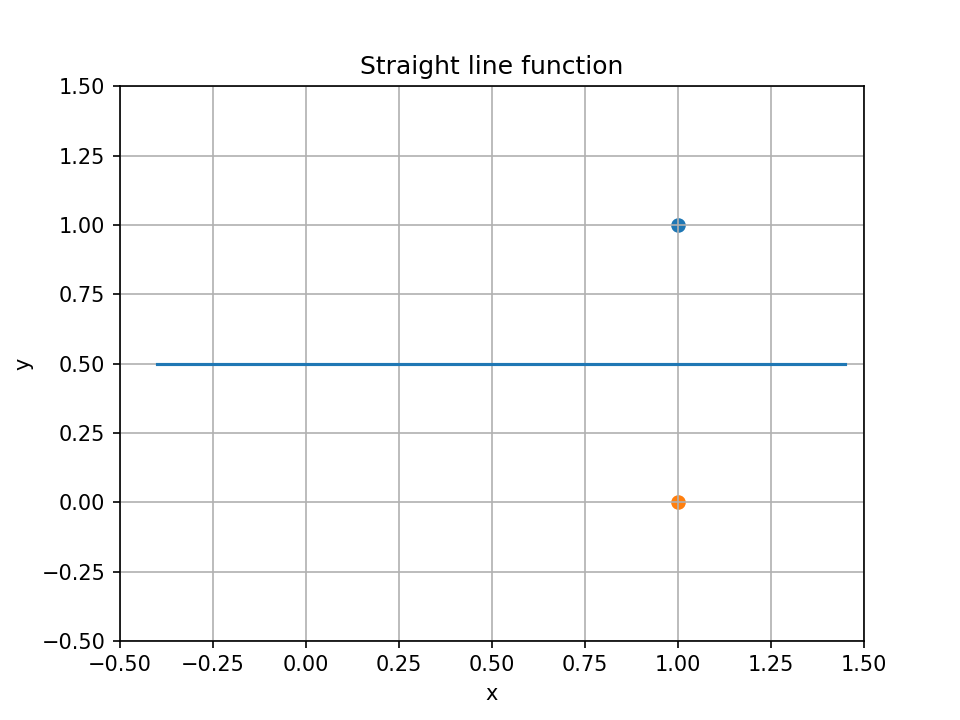

In [5]:
# Plotting a line in 2D space. 
x = np.arange(-0.4, 1.5, .05)
sigma_fn = np.vectorize(straight_line)
sigma = sigma_fn(0,x,0.5)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(x, sigma)

ax.scatter(1,1)
ax.scatter(1,0)


ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-0.5,1.5])
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Straight line function')

fig.show()


The equation of the line above is $ y = 0x + 0.5 $
We know another form of a line is $ Ax + By + c = 0 $

If we rearrange $ y = 0x + 0.5 $ we can get our line into the other form  $ y - 0.5 = 0 $.  
This equation asking to plot all the points where the y coordinate - 0.5 is 0. 

We know our points do not belong on this line because:

The blue point has the y coordinate of 1. $ 1 - 0.5  = 0.5 $, which is more than 0, so we are above the line. 

The orange point has the y coordinate of 0. $ 0 - 0.5  = -0.5 $ which is less than 0, so we are below the line.  

So our new equation of a line $ Ax + By + c = 0 $ is quite useful to *classify* if a point is on either side of a line. 

# Looking at some data
Note this is a 2D plot. 

<IPython.core.display.Javascript object>


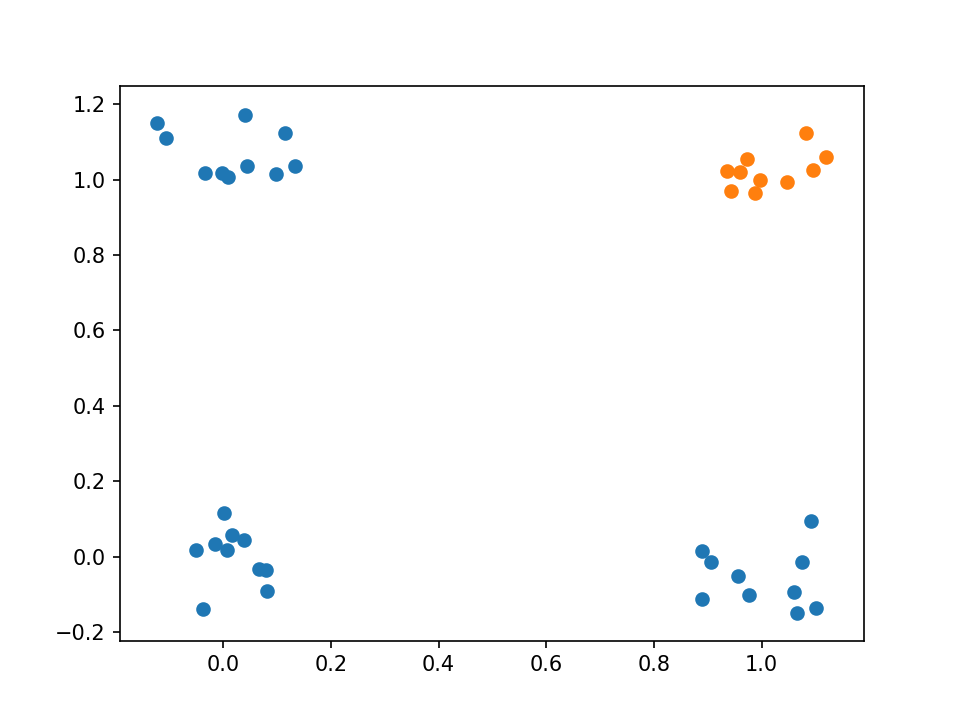

In [6]:
plt.figure(0)
mu, sigma = 0, 0.07 # mean and standard deviation

zero_x = np.random.normal(0, sigma, 10)
zero_y = np.random.normal(0, sigma, 10)

one_x = np.random.normal(0, sigma, 10)
one_y = np.random.normal(1, sigma, 10)

two_x = np.random.normal(1, sigma, 10)
two_y = np.random.normal(0, sigma, 10)

three_x = np.random.normal(1, sigma, 10)
three_y = np.random.normal(1, sigma, 10)


# Making a NAND classification 
positive_x = np.concatenate((zero_x, one_x, two_x))
positive_y = np.concatenate((zero_y, one_y, two_y))


plt.scatter(positive_x, positive_y)
plt.scatter(three_x, three_y)

plt.show()

# An objective 
So our job is to find a function which takes in too points and labels it into the correct class. 

We have no idea where to start so lets pick the simplist kind of function a linear one. 
We remember that a linear equation of a straight line is: 
$ y = ax + b $  
Lets try and move it around and think about what we can do with it. 

<IPython.core.display.Javascript object>


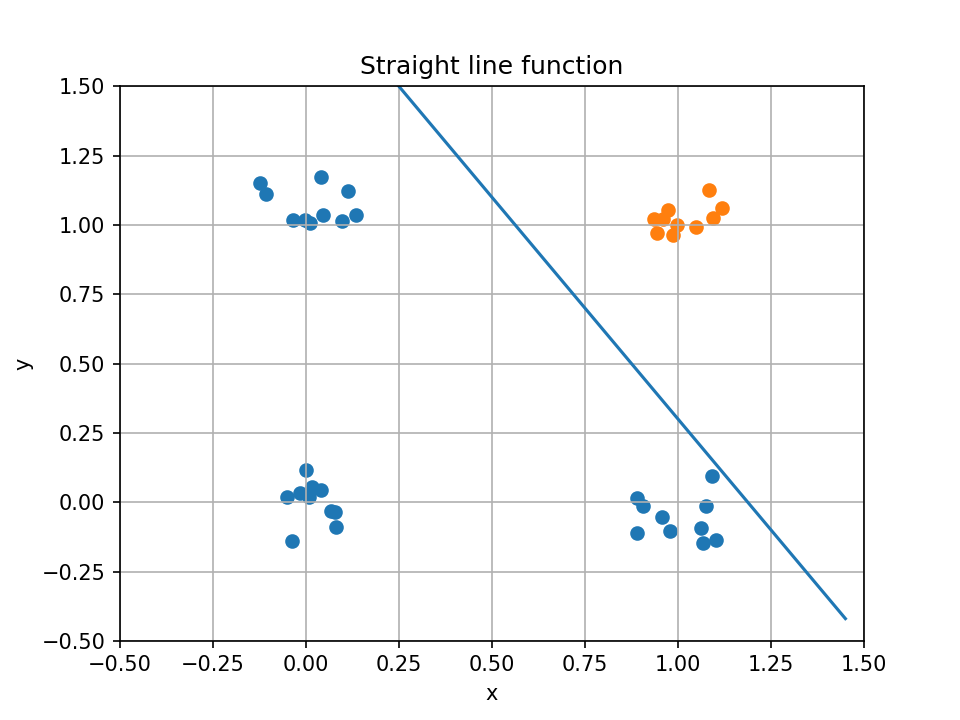

interactive(children=(FloatSlider(value=0.0, description='w', max=3.0, min=-3.0), FloatSlider(value=0.0, descr…

In [7]:
# Plotting the output of a hidden neuron 
x = np.arange(-0.4, 1.5, .05)
sigma_fn = np.vectorize(straight_line)
sigma = sigma_fn(1,x,1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(x, sigma)

# Our data labelled with the correct colour class 
plt.scatter(positive_x, positive_y)
plt.scatter(three_x, three_y)

ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-0.5,1.5])
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Straight line function')

def update(w = 1.0, b = 1.0):
    line.set_ydata(sigma_fn(x,w,b))
    fig.canvas.draw_idle()

slow = interactive(update,w=FloatSlider(min=-3, max=3, step=0.1), b =FloatSlider(min=-3, max=3, step=0.1));
fig.show()
slow

We can move the line such that it splits the classes up and seperates the blue points from the orange. We need someway to make this useful...

<IPython.core.display.Javascript object>


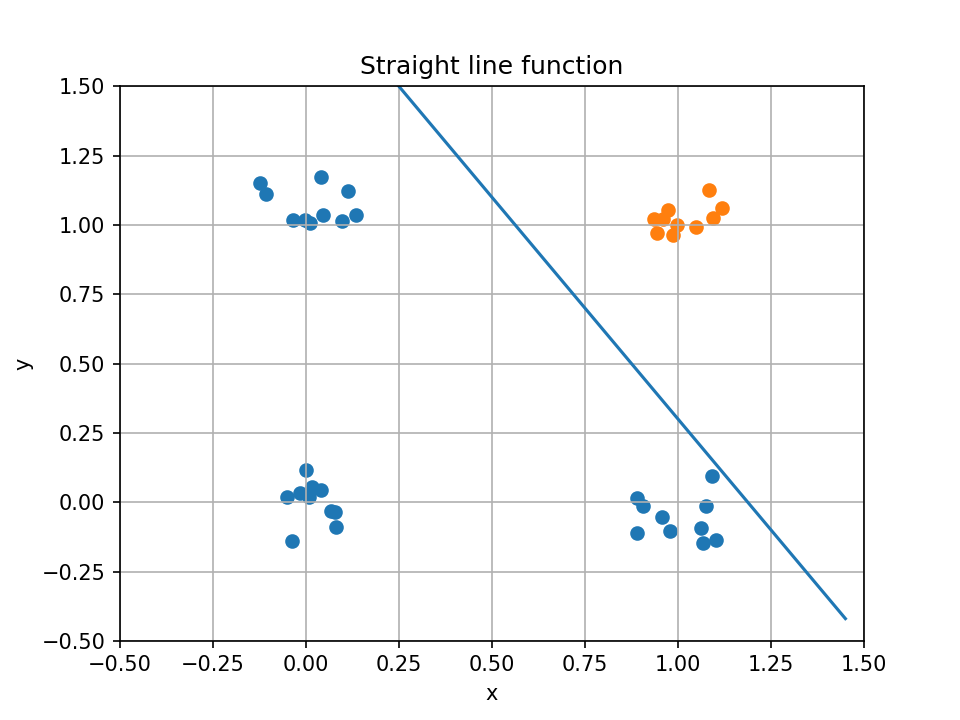

Text(0.5, 1.0, 'Straight line function')

In [10]:
our_a = -1.6
our_b = 1.9

# Plotting the output of a hidden neuron 
x = np.arange(-0.4, 1.5, .05)
sigma_fn = np.vectorize(straight_line)
sigma = sigma_fn(our_a,x,our_b)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(x, sigma)

# Our data labelled with the correct colour class 
plt.scatter(positive_x, positive_y)
plt.scatter(three_x, three_y)

ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-0.5,1.5])
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Straight line function')

# Running out of ideas...
The line we have picked looks like a possible decision boundry. 
$ y = ax + b $

$$ y = -1.6x + 1.9 $$

We remember from before that we can tell which side of the line a point is on by rearranging the equation of our line into the form $ Ax + By + c = 0 $.

### Mathematically:
Recall that A x + B y > C and A x + B y < C are the two regions on the xy plane separated by the line A x + B y + C = 0. If we consider the input (x, y) as a point on a plane, then the perceptron actually tells us which region on the plane to which this point belongs. Such regions, since they are separated by a single line, are called linearly separable regions.

So lets take some points, either side of our decision boundry and see what we get. 

$$ 1.6x + y - 1.9 = 0 $$

In [4]:
def line(a,x,b,y,c):
    # A function of a line in our preferred form. 
    l = a*x + b*y + c 
    return l
sigma_fn = np.vectorize(line)

Remember that positive_x are all the blue points and negative_x are all our orange points.

In [12]:
sigma_fn(-our_a,positive_x, 1, positive_y,-our_b)

array([-1.96220633, -2.10093494, -1.86971163, -1.82736932, -1.79276705,
       -1.8076573 , -1.78245443, -1.81955   , -1.88930813, -1.86187095,
       -0.79165716, -0.88751764, -0.93842085, -0.94549346, -0.59308612,
       -0.96048544, -0.7294129 , -0.66220962, -0.64974806, -0.8764815 ,
       -0.34310989, -0.46327572, -0.29688441, -0.46234333, -0.19470249,
       -0.42269599, -0.27583417, -0.43832435, -0.58775828, -0.05841668])

In [13]:
# Lets try our orange points
sigma_fn(-our_a,three_x,1,three_y,-our_b)

array([0.69642149, 0.87845952, 0.64445547, 0.57809376, 0.77017866,
       0.95791126, 0.6174958 , 0.71018443, 0.95059615, 0.65765415])

# It worked!
All the ones on the left of the line are negative
All the ones on the right are positive. 

So to make a classifier, we can just say if the answer to this function is positive, predict orange, otherwise predict blue. 

In [14]:
def predict(x,y):
    a = sigma_fn(-our_a,x,1,y,-our_b)
    if (a > 0):
        return "Orange"
    else:
        return "Blue"


# What does this have to do with perceptrons? 

![Perceptron](https://miro.medium.com/max/2586/1*8zQW3SanV2FQr5iYPY-2Gg.png)

A perceptron is when you take in an input, multiply it by a weight, sum them and then add a bias term. Mathematically this looks like: $$ y = x_1 * \theta_1 + x_2 * \theta_2 + b $$
If $ y > 0 $ predict $1$, else $0$.

If we change the name of the variables used we get a farmiliar equation: 
 $$ A x + B y + C = p $$ 
If $ p > 0 $ predict $1$, else $0$.

It's the equation of a line, we just made earlier. 
Oh wait, we just invented feedforward for perceptrons. 

Lets pick a point and test it out:

In [15]:
predict(0,0)

'Blue'

Image of a perceptron was stolen from [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Fperceptron-algorithms-for-linear-classification-e1bb3dcc7602&psig=AOvVaw1kp9hsTLLWso1pLJERSszr&ust=1585841157974000&source=images&cd=vfe&ved=0CAkQjhxqFwoTCNiar-nEx-gCFQAAAAAdAAAAABAE). 

So lets see what we can do with it. 

# Solving NAND

![NAND Gate](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Faccendoreliability.com%2Fwp-content%2Fuploads%2F2017%2F07%2FLogic-gate-nand-us.png&f=1&nofb=1)

A NAND gate is a fundamental logic gate in computing. 
They have the following properties, given inputs A, B they output Y. 

|A|B|Y|
|-|-|-|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

It turns out that if you have enough NAND gates you could build a whole computer, from the ALU (Arithmetic and Logic Unit) to the storage (Flip Flops), so if we can make a binary classifier that replicates a NAND, we know we have found a good building block that might suggest these perceptrons are useful. 

In [14]:
def hidden_XY(x,y,w,b):
    out = w*x + w*y + b
    return out

def perceptron(x,y,w,b):
    o = hidden_XY(x,y,w,b)
    if (o > 0):
        return 1
    else:
        return 0

The equation for a perceptron is:
$$ w_1 x_1 + w_2 y + b = 0 $$
As we know, this is just a rearranged equation of a line, by setting the equations of each to be equal to eachother we can find a way to transform our equation of a line into a perceptron.   

$$ w_1 x_1 + w_2 y + b = Ax + By + c $$

The y intercept of a line occurs when the x is zero, it gives us this point:
$ Y-Intercept = (0,-b/w_2) $  
The x intercept of a line occurs when the y is zero, it gives us this point:
$ X-Intercept = (-b/w_1,0) $

So if we find the x and y intercepts from my line, we can use it to get the weights for a perceptron:

For my line: $y = -1.6x + 1.9 $
When x is 0, y is 1.9.  
When y is 0, x is $ 1.9 / 1.6  = 1.1875 $

Giving us: 

$ -b/w_1 = 1.9 $  
$ -b/w_2 = 1.1875 $   
So we can pick out bias, and then calculate the weights:

This gives us:  
 $ b = -1 $   
$ w_1 = -10/19 $    
$ w_2 = -16/19  $  


In [15]:
def hidden_XY(x,y,w_x, w_y,b):
    out = w_x*x + w_y*y + b
    return out

def perceptron(x,y,w_x, w_y,b):
    o = hidden_XY(x,y,w_x, w_y,b)
    if (o > 0):
        return "Orange"
    else:
        return "Blue"

multi_percpt = np.vectorize(perceptron)
multi_hidden = np.vectorize(hidden_XY)

In [16]:
multi_percpt(three_x,three_y,-10/19, -16/19,-1)

array(['Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue',
       'Blue', 'Blue'], dtype='<U4')

In [30]:
multi_hidden(positive_x,positive_y,-10/19, -16/19,-1)

array([-0.96720687, -0.95079498, -0.90716381, -1.08739171, -0.93956517,
       -0.9518537 , -0.94125147, -0.87487918, -1.02030487, -1.10405312,
       -1.9036283 , -1.90708618, -1.84007381, -1.8591406 , -1.88094778,
       -1.64006098, -1.76181068, -2.0192567 , -1.7997889 , -1.79663972,
       -1.45718222, -1.5498664 , -1.52329783, -1.4615282 , -1.57585694,
       -1.54659748, -1.62901512, -1.50631339, -1.48734233, -1.44831319])

|A|B|Y|
|-|-|-|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

$$ y = \sigma(wx+b) $$

## An important point to stop and think about what we have done. 

[Tensorflow playground.](https://playground.tensorflow.org)

An interactive example of showing how using multiple of these lines can help us classify points in many different distributions.   
![Circle](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRAEEDUPp7NyPC2OqeIHmK8_sb9QC-kJdHVBBqtnWQG2qxepfpx&usqp=CAU)
Notice on the circle example that we are overlapping and moving around many different lines to make a quite complex decision boundry. 

This is one way of explaning something called Universal Approximation theory. The word approximation here is important, notice how the more neurons/lines we build on top of eachother we get close and closer to something looking line a circle. 

The truth is you would need an infinite amount of tangent lines to generate a circle, but we can approximate a circle using a finite number of lines. 

# Link to Next Notebook. 
## Explaning Universal Function approximation and the use of the sigmoid function. 

http://localhost:8888/notebooks/FastAI/Lesson3/Universal%20Approximation%20Theory.ipynb


# An alternate way of looking at perceptrons. (Linear Algebra)

For any number of inputs you may have seen an equation for a perceptron looking like this: 

$$ y = \sigma(Wx + b) $$ 
Where $w$ is a weight matrix (rotates a line).     
$ x $ is your input vector.   
$ y $ is your output vector.    
$ x $ is your bias vector (moves/shifts the line around). 

This is using an operation called a dot product, $Wx$, between a vector (the weights of our perceptron) and another vector (our inputs). 

A dot product is usually done between matrices and vectors, you can see what this looks like here:
[Matrix Visualiser.](https://shad.io/MatVis/) 

A dot product between a metrix and a vector is doing a projection. It projects 2d space to a line. If you set the bottom components of the matrix to zeros, you can see what this looks like. 

Visualising Linear Transformations:
https://www.khanacademy.org/math/linear-algebra/matrix-transformations/linear-transformations/a/visualizing-linear-transformations

### Other sources:
https://medium.com/@thomascountz/calculate-the-decision-boundary-of-a-single-perceptron-visualizing-linear-separability-c4d77099ef38

https://brilliant.org/wiki/perceptron/

https://cs.stanford.edu/people/eroberts/courses/soco/projects/neural-networks/Neuron/index.html

# Can we solve other gates:
NAND is just one type of logic gate, it turns out there are many. 
XOR is another type of gate that has these properties:

|A|B|Y|
|-|-|-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

<IPython.core.display.Javascript object>


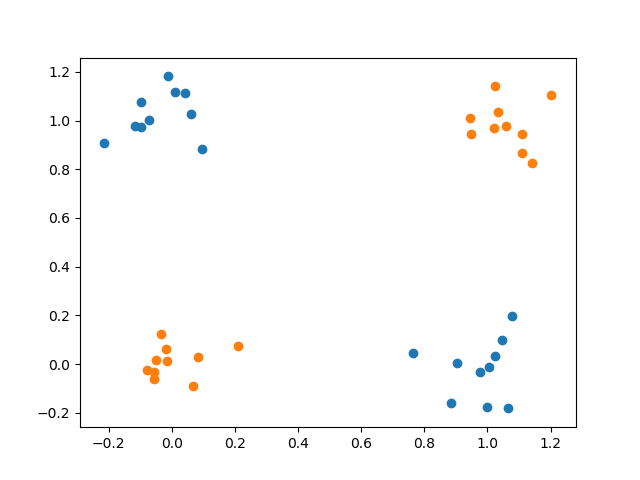

In [17]:
plt.figure(3)
mu, sigma = 0, 0.1 # mean and standard deviation

zero_x = np.random.normal(0, sigma, 10)
zero_y = np.random.normal(0, sigma, 10)

one_x = np.random.normal(0, sigma, 10)
one_y = np.random.normal(1, sigma, 10)

two_x = np.random.normal(1, sigma, 10)
two_y = np.random.normal(0, sigma, 10)

three_x = np.random.normal(1, sigma, 10)
three_y = np.random.normal(1, sigma, 10)


# Making an XOR classification 
positive_x = np.concatenate((one_x, two_x))
positive_y = np.concatenate((one_y, two_y))

negative_x = np.concatenate((zero_x, three_x))
negative_y = np.concatenate((zero_y, three_y))

plt.scatter(positive_x, positive_y)
plt.scatter(negative_x, negative_y)

plt.show()

<IPython.core.display.Javascript object>


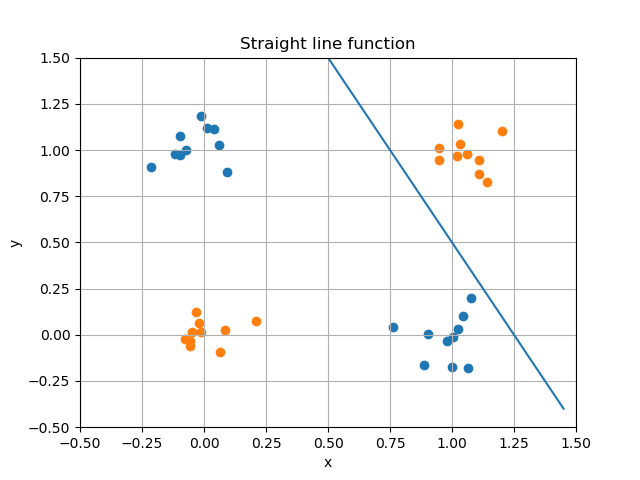

interactive(children=(FloatSlider(value=0.0, description='a', max=3.0, min=-3.0), FloatSlider(value=0.0, descr…

In [18]:
# Plotting the output of a hidden neuron 
x = np.arange(-0.4, 1.5, .05)
sigma_fn = np.vectorize(straight_line)
sigma = sigma_fn(1,x,1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(x, sigma)

# Our data labelled with the correct colour class 
plt.scatter(positive_x, positive_y)
plt.scatter(negative_x, negative_y)

ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-0.5,1.5])
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Straight line function')

def update(a = 1.0, b = 1.0):
    line.set_ydata(sigma_fn(a,x,b))
    fig.canvas.draw_idle()

slow = interactive(update,a=FloatSlider(min=-3, max=3, step=0.1), b =FloatSlider(min=-3, max=3, step=0.1));
fig.show()
slow

In [ ]:
# Plotting the output of a hidden neuron 
x = np.arange(-0.4, 1.5, .05)
sigma_fn = np.vectorize(straight_line)
sigma = sigma_fn(1,x,1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(x, sigma)

# Our data labelled with the correct colour class 
plt.scatter(positive_x, positive_y)
plt.scatter(negative_x, negative_y)

ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-0.5,1.5])
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Straight line function')

def update(a = 1.0, b = 1.0):
    line.set_ydata(sigma_fn(a,x,b))
    fig.canvas.draw_idle()

slow = interactive(update,a=FloatSlider(min=-3, max=3, step=0.1), b =FloatSlider(min=-3, max=3, step=0.1));
fig.show()
slow

It is clear we are going to need more than one line. XOR needs two lines (neurons) to classify. 

## To be continued... 